# The Spies Among Us<a class="anchor" id="toc"></a>
***
Group: Joana Santos | Jonas de Sousa | Mariana Adão | Paula Eveling | Remi Verronneau


## Table of Contents

1. [Introduction and Methodology](#introduction)
2. [Business Understanding](#business)
3. [Exploration and Understanding](#exploration)
4. [Pre-processing](#preprocessing)
5. [Modelling](#modelling)
6. [Performance Assessment](#performance)
7. [Conclusion](#conclusion)

Teste

## 1. Introduction and Methodology<a class="anchor" id="introduction"></a>
[Back to Contents](#toc)

### 1.1 Introduction

The president of the USA is getting increasingly worried that foreign forces might be infiltrating
spies to steal its most precious asset: information.

This has happened in the past, causing major setbacks to the economy and loss of trust among
the citizens. Many attempts have been made to contain the problem, but the population started to
protest against the additional measures because people started to feel invaded in their privacy. In
order to attend to general privacy concerns, the president asked his ministers for a strategy that
would protect the country’s information while preserving the privacy of ordinal citizens. As the
minister of defence noted, based on previous data, it seems that there are some groups of people
more likely to be spies than others. That is why your team of data scientists has been hired.

Previously detected cases of espionage have been meticulously registered in the general citizen
database, where all citizens are anonymously registered for statistical purposes, and which is
updated yearly. Your goal is to build a predictive model that, for this year’s additions to the
database, answers the question “Which citizens should be placed under close surveillance?” using
a set of pre-selected variables accessible from the last year’s citizen database, explained bellow.
As data scientists, your team is asked to analyse and transform as needed the data available and
apply different models in order to answer the defined question in the most accurate way.
<div class="separator"></div>

### 1.2 Methodology
Add content here!
<div class="separator"></div>

## 2. Business Understanding <a class="anchor" id="business"></a>
[Back to Contents](#toc)

### 2.1 Business Objectives
Your goal is to build a predictive model that answers the question “Which citizens should be placed
under close surveillance?” using the small quantity of data accessible from the USA database that
contains general information about the citizens.
<div class="separator"></div>

### 2.2 Situation Assessment
Add content here!
<div class="separator"></div>

#### Requirements
Add content here!
<div class="separator"></div>

#### Assumptions
Add content here!
<div class="separator"></div>

#### Risks
Add content here!
<div class="separator"></div>

<div class="alert alert-block alert-danger">
<b>Important:</b> A false negative result can be catastrophic. Use the <u>recall</u> metric to evaluate the model's performance.
</div>


### 2.3 Data Mining Goals
Add content here!
<div class="separator"></div>

## 3. Data Exploration and Understanding <a class="anchor" id="exploration"></a>
[Back to Contents](#toc)

Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics often using statistical graphs and other data visualization methods. Through the process of EDA, one can get a better understanding of the dataset variables and the relationship between them, making it easier to discover patterns, detect outliers and anomalies, and test underlying assumptions.
<div class="separator"></div>

### 3.1 Data Collection
The dataset used in this analysis was provided by the stakeholders in March 2022 and it has been split into two groups:

- <b>Train set</b> - The training set should be used to build your machine learning models and
assess their performance if needed. In this set, you also have the ground truth associated
with each citizen, i.e., if the citizen is a spy or not.
- <b>Test set</b> - The test set should be used to see how well your model performs on unseen
data. In this set, you don’t have access to the ground truth, and the goal of your team is
to predict that value (0 or 1) by using the model you created based on the training set.
The predicted values in the test set should be submitted on Kaggle. The score of your
predictions will be evaluated using the F1 Score. 
<div class="separator"></div>

### 3.2 Data Description

#### Variables Description

Variable      | Description 
:---------|:-----------
ID      | The unique identifier of the citizen
Gender   | The gender of the citizen
Age   | The age (in years) of the citizen
Area_Residence   | Area of residence
Household_Income   | The household income
Household_Size   | Number of people in the citizen’s household including himself
Foreign_Citizenship   | If the citizen has foreign citizenship
Frequent_Traveler   | If the citizen is a frequent traveler (travels more than twice a year)
Social_Person   | If the citizen is seen as social
Cellphone_Usage   | Cell phone usage level of the citizen
Occupation   | The type of occupation the citizen has (if employed the type of employer is mentioned – self-employed, government, private or public company)
Military_Service   | If the citizen has completed military service
Political_Participation   | Political participation level (considering activities such as voting in elections, starting and participating in petitions, etc.)
Satisfaction_Level   | The satisfaction level with the standard of living in the country
Spy   | If the citizen has been identified as a spy


#### Importing Libraries

In [1]:
# Install the following packages before running this application
!pip install plotly
!pip install chart_studio

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=d73fe106e231a2908fd1e80092ed8ed5f187939556f244697c672098e72c51f3
  Stored in directory: c:\users\jomar\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [3]:
# importing required libraries that will be used in this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")

#### Loading Train Dataset

In [4]:
# Loading the dataset and visualizing summary statistics
df = pd.read_csv('datasets/espionage_data.csv')

In [3]:
# Show top 5 rows
df.head()

,ID,ID_ORIGINAL,Gender,Foreign_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,Spy,Satisfaction_Level,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service,Household_Income
0,1000,467329,Female,No,40,Yes,Low,1.0,1,4.0,Government,No involvement,No,City,Never,7000
1,1001,461212,Female,No,30,No,Low,6.0,0,1.0,Nothing,No involvement,No,City,Never,19610
2,1002,466216,Male,No,29,No,Low,4.0,0,1.0,Private company,Strong involvement,Yes,Country-side,Never,8261
3,1003,462613,Female,Yes,35,No,Average,5.0,0,1.0,Private company,No involvement,Yes,Country-side,Never,7000
4,1004,465709,Male,Yes,68,Yes,Average,2.0,1,4.0,Private company,Strong involvement,No,City,Never,8261


In [6]:
# Show last 5 rows
df.tail()

,ID,ID_ORIGINAL,Gender,Foreign_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,Spy,Satisfaction_Level,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service,Household_Income
6494,7494,465027,Male,Yes,41,Yes,Low,2.0,1,3.0,Government,No involvement,No,City,Never,7000
6495,7495,462216,Female,Yes,42,No,Low,2.0,0,3.0,Government,No involvement,Yes,Country-side,Never,8261
6496,7496,459368,Male,Yes,28,No,Low,7.0,0,1.0,Public company,No involvement,Yes,Country-side,Never,7000
6497,7497,467339,Male,NaN,55,Yes,Average,3.0,1,2.0,Private company,Unknown,No,City,Never,8261
6498,7498,465275,Male,No,27,Yes,Low,5.0,0,1.0,Private company,Some involvement,No,City,Never,8261


#### Statistical Description

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       8000 non-null   int64  
 1   ID_ORIGINAL              8000 non-null   int64  
 2   Gender                   8000 non-null   object 
 3   Foreign_Citizenship      7862 non-null   object 
 4   Age                      8000 non-null   int64  
 5   Frequent_Traveler        7923 non-null   object 
 6   Cellphone_Usage          8000 non-null   object 
 7   Household_Size           7670 non-null   float64
 8   Spy                      8000 non-null   int64  
 9   Satisfaction_Level       7670 non-null   float64
 10  Occupation               7876 non-null   object 
 11  Political_Participation  7876 non-null   object 
 12  Social_Person            7924 non-null   object 
 13  Area_Residence           7924 non-null   object 
 14  Military_Service        

In [15]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,8000.0,NaN,NaN,NaN,4999.5,2309.54541,1000.0,2999.75,4999.5,6999.25,8999.0
ID_ORIGINAL,8000.0,NaN,NaN,NaN,463456.46225,2585.043875,458982.0,461226.75,463448.5,465716.25,467974.0
Gender,8000,2,Male,4392,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Foreign_Citizenship,7862,2,Yes,4632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8000.0,NaN,NaN,NaN,43.576625,16.704319,18.0,31.0,41.0,53.0,89.0
Frequent_Traveler,7923,2,Yes,4938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cellphone_Usage,8000,3,Low,4815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Household_Size,7670.0,NaN,NaN,NaN,2.844329,1.527431,1.0,2.0,3.0,4.0,9.0
Spy,8000.0,NaN,NaN,NaN,0.477625,0.49953,0.0,0.0,0.0,1.0,1.0
Satisfaction_Level,7670.0,NaN,NaN,NaN,2.641851,1.711686,1.0,1.0,2.0,4.0,9.0


#### Distribution

In [39]:
# Histogram of numeric variables
fig = make_subplots(rows=2, cols=2,
                    vertical_spacing=0.1, horizontal_spacing=0.1,
                    subplot_titles=("Age", "Household", "Satisfaction", "Income"))

fig.add_trace(go.Histogram(x=df['Age'],marker=dict(color= '#808da6'), name='Age'), 
                     row=1, col=1)
fig.add_trace(go.Histogram(x=df['Household_Size'],marker=dict(color= '#808da6'), name='Household Size'), 
                     row=1, col=2)
fig.add_trace(go.Histogram(x=df['Satisfaction_Level'],marker=dict(color= '#808da6'), name='Satisfaction Level'), 
                     row=2, col=1)
fig.add_trace(go.Histogram(x=df['Household_Income'],marker=dict(color= '#808da6'), name='Household Income'), 
                     row=2, col=2)

# styling
fig.update_yaxes(showgrid=False, ticksuffix=' ')
fig.update_xaxes(visible=True)
fig.update_layout(height=700, bargap=0.5,
                  margin=dict(b=1,r=20,l=20), xaxis=dict(),
                  title_text=f'Numerical Variables Distributions',
                  template="plotly_white",
                  title_font=dict(size=25, color='#496595'),
                  font=dict(color='#8a8d93'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13),
                  showlegend=False)

       

In [40]:
#Save the figure for the report 
fig.write_image(file='numeric_dist.png', format='png')

#### Outliers

<div class="alert alert-block alert-warning">
<b>Note:</b> There seems to be outliers in this dataset.
</div>

In [42]:
# Boxplot of numeric variables
fig = make_subplots(rows=1, cols=4,
                    vertical_spacing=0.1, horizontal_spacing=0.1,
                    subplot_titles=("Age", "Household", "Satisfaction", "Income"))

fig.add_trace(go.Box(y=df['Age'],marker=dict(color= '#808da6'), name='Age'), 
                     row=1, col=1)
fig.add_trace(go.Box(y=df['Household_Size'],marker=dict(color= '#808da6'), name='Household Size'), 
                     row=1, col=2)
fig.add_trace(go.Box(y=df['Satisfaction_Level'],marker=dict(color= '#808da6'), name='Satisfaction Level'), 
                     row=1, col=3)
fig.add_trace(go.Box(y=df['Household_Income'],marker=dict(color= '#808da6'), name='Household Income'), 
                     row=1, col=4)

# styling
fig.update_yaxes(showgrid=False, ticksuffix=' ')
fig.update_xaxes(visible=False)
fig.update_layout(height=300, bargap=0.2,
                  margin=dict(b=0,r=20,l=20), xaxis=dict(tickmode='linear'),
                  title_text=f'Numerical Variables Boxplots',
                  template="plotly_white",
                  title_font=dict(size=25, color='#496595'),
                  font=dict(color='#8a8d93'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13),
                  showlegend=False)

In [43]:
#Save the figure for the report 
fig.write_image(file='boxplots.png', format='png')

#### Missing Values

The dataset contains a total of 564 rows with missing values, accounting for 8.67% of the total observations. Considering the high representativity of the rows with missing values, removing them altogether is not a viable solution as it could impact the results of this project. In order to understand the cause of missing values, a meeting with the stakeholders was carried out.

<div class="alert alert-block alert-warning">
<b>Important:</b> Rows with missing values represent 8.67% of the dataset. Therefore, the variables must be treated concerning its specifications.
</div>

In [5]:
#### Transfor the "Unknown" in Political_participation as missing
df['Political_Participation'] = df['Political_Participation'].replace('Unknown', np.NaN)

In [6]:
#Check unique values of Political_participatgion 
df.Political_Participation.unique()

array(['No involvement', 'Strong involvement', 'Some involvement', nan],
      dtype=object)

In [7]:
print("\nMISSING VALUES BY VARIABLE: \n", (df.isnull().sum())*100/len(df))
print("\nROWS WITH MISSING VALUES: \n", df.shape[0] - df.dropna().shape[0])

# missing values table
null_date = df[df.isnull().any(axis=1)]

# null values descriptive table
null_date.describe().T


MISSING VALUES BY VARIABLE: 
 ID                          0.0000
ID_ORIGINAL                 0.0000
Gender                      0.0000
Foreign_Citizenship         1.7250
Age                         0.0000
Frequent_Traveler           0.9625
Cellphone_Usage             0.0000
Household_Size              4.1250
Spy                         0.0000
Satisfaction_Level          4.1250
Occupation                  1.5500
Political_Participation    32.8625
Social_Person               0.9500
Area_Residence              0.9500
Military_Service            0.9500
Household_Income            0.0000
dtype: float64

ROWS WITH MISSING VALUES: 
 3059


,count,mean,std,min,25%,50%,75%,max
ID,3059.0,4959.295848,2307.830433,1007.0,2993.0,4904.0,6937.5,8998.0
ID_ORIGINAL,3059.0,463436.246813,2647.229861,458984.0,461157.5,463476.0,465752.5,467974.0
Age,3059.0,45.569794,13.463584,18.0,36.0,45.0,53.0,89.0
Household_Size,2729.0,2.555148,1.380896,1.0,2.0,2.0,3.0,9.0
Spy,3059.0,0.642694,0.479284,0.0,0.0,1.0,1.0,1.0
Satisfaction_Level,2729.0,2.862221,1.510981,1.0,2.0,2.0,4.0,9.0
Household_Income,3059.0,10095.406669,4200.654285,7000.0,7000.0,8261.0,12044.0,24654.0


In [7]:
missings = (df.isnull().sum())*100/len(df)
missings.to_csv("missings.csv")

#Get dummies 

In [8]:
df2 = pd.get_dummies(df,prefix_sep =".",  dummy_na=True)
df2.columns

Index(['ID', 'ID_ORIGINAL', 'Age', 'Household_Size', 'Spy',
       'Satisfaction_Level', 'Household_Income', 'Gender.Female',
       'Gender.Male', 'Gender.nan', 'Foreign_Citizenship.No',
       'Foreign_Citizenship.Yes', 'Foreign_Citizenship.nan',
       'Frequent_Traveler.No', 'Frequent_Traveler.Yes',
       'Frequent_Traveler.nan', 'Cellphone_Usage.Average',
       'Cellphone_Usage.High', 'Cellphone_Usage.Low', 'Cellphone_Usage.nan',
       'Occupation.Government', 'Occupation.Nothing',
       'Occupation.Private company', 'Occupation.Public company',
       'Occupation.Self-employed', 'Occupation.Student', 'Occupation.nan',
       'Political_Participation.No involvement',
       'Political_Participation.Some involvement',
       'Political_Participation.Strong involvement',
       'Political_Participation.nan', 'Social_Person.No', 'Social_Person.Yes',
       'Social_Person.nan', 'Area_Residence.City',
       'Area_Residence.Country-side', 'Area_Residence.nan',
       'Military_Serv

In [9]:
df2.loc[df2["Gender.nan"] == 1, ["Gender.Male", "Gender.Male"]] = np.nan

df2.loc[df2["Foreign_Citizenship.nan"] == 1, ["Foreign_Citizenship.No", "Foreign_Citizenship.Yes"]] = np.nan

df2.loc[df2["Frequent_Traveler.nan"] == 1, ["Frequent_Traveler.No", "Frequent_Traveler.Yes"]] = np.nan

df2.loc[df2["Cellphone_Usage.nan"] == 1, ["Cellphone_Usage.Average", "Cellphone_Usage.High", "Cellphone_Usage.Low"]] = np.nan

df2.loc[df2["Occupation.nan"] == 1, ["Occupation.Government", "Occupation.Nothing", "Occupation.Private company", 'Occupation.Public company', 'Occupation.Self-employed', 'Occupation.Student']] = np.nan

df2.loc[df2["Political_Participation.nan"] == 1, ['Political_Participation.No involvement', 'Political_Participation.Some involvement', 'Political_Participation.Strong involvement']] = np.nan

df2.loc[df2["Social_Person.nan"] == 1, ['Social_Person.No', 'Social_Person.Yes']] = np.nan

df2.loc[df2["Area_Residence.nan"] == 1, ['Area_Residence.City', 'Area_Residence.Country-side']] = np.nan

df2.loc[df2["Military_Service.nan"] == 1, ['Military_Service.Intervention in Iraq','Military_Service.Intervention in Libya','Military_Service.Intervention in Syria', 'Military_Service.Never']] = np.nan

In [10]:
del df2["Gender.nan"]
del df2["Foreign_Citizenship.nan"]
del df2["Frequent_Traveler.nan"]
del df2["Cellphone_Usage.nan"]
del df2["Occupation.nan"]
del df2["Political_Participation.nan"]
del df2["Social_Person.nan"]
del df2["Area_Residence.nan"]
del df2["Military_Service.nan"]


In [11]:

print("\nMISSING VALUES BY VARIABLE: \n", (df2.isnull().sum())*100/len(df2))


MISSING VALUES BY VARIABLE: 
 ID                                             0.0000
ID_ORIGINAL                                    0.0000
Age                                            0.0000
Household_Size                                 4.1250
Spy                                            0.0000
Satisfaction_Level                             4.1250
Household_Income                               0.0000
Gender.Female                                  0.0000
Gender.Male                                    0.0000
Foreign_Citizenship.No                         1.7250
Foreign_Citizenship.Yes                        1.7250
Frequent_Traveler.No                           0.9625
Frequent_Traveler.Yes                          0.9625
Cellphone_Usage.Average                        0.0000
Cellphone_Usage.High                           0.0000
Cellphone_Usage.Low                            0.0000
Occupation.Government                          1.5500
Occupation.Nothing                             1.55

#Min max normalization


In [12]:
##MIN MAX NORMALIZATION FOR THE PAIRWISE CODE
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df2_2 = pd.DataFrame(min_max_scaler.fit_transform(df2))
df2_2 = pd.DataFrame(data=df2_2.values, columns=df2.columns)
df2_2[["ID", "ID_ORIGINAL"]] = df2[["ID", "ID_ORIGINAL"]]

In [13]:
print("\nMISSING VALUES BY VARIABLE: \n", (df2_2.isnull().sum())*100/len(df2_2))


MISSING VALUES BY VARIABLE: 
 ID                                             0.0000
ID_ORIGINAL                                    0.0000
Age                                            0.0000
Household_Size                                 4.1250
Spy                                            0.0000
Satisfaction_Level                             4.1250
Household_Income                               0.0000
Gender.Female                                  0.0000
Gender.Male                                    0.0000
Foreign_Citizenship.No                         1.7250
Foreign_Citizenship.Yes                        1.7250
Frequent_Traveler.No                           0.9625
Frequent_Traveler.Yes                          0.9625
Cellphone_Usage.Average                        0.0000
Cellphone_Usage.High                           0.0000
Cellphone_Usage.Low                            0.0000
Occupation.Government                          1.5500
Occupation.Nothing                             1.55

# Knn imputer

In [14]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df3 = pd.DataFrame(imputer.fit_transform(df2_2))
df3 = pd.DataFrame(data=df3.values, columns=df2_2.columns)

df_imputed = pd.DataFrame(min_max_scaler.inverse_transform(df3))
df_imputed = pd.DataFrame(data=df_imputed.values, columns=df2.columns)
df_imputed[["ID", "ID_ORIGINAL"]] = df2[["ID", "ID_ORIGINAL"]]

df_imputed.head()



,ID,ID_ORIGINAL,Age,Household_Size,Spy,Satisfaction_Level,Household_Income,Gender.Female,Gender.Male,Foreign_Citizenship.No,...,Political_Participation.Some involvement,Political_Participation.Strong involvement,Social_Person.No,Social_Person.Yes,Area_Residence.City,Area_Residence.Country-side,Military_Service.Intervention in Iraq,Military_Service.Intervention in Libya,Military_Service.Intervention in Syria,Military_Service.Never
0,1000,467329,40.0,1.0,1.0,4.0,7000.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1001,461212,30.0,6.0,0.0,1.0,19610.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1002,466216,29.0,4.0,0.0,1.0,8261.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1003,462613,35.0,5.0,0.0,1.0,7000.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1004,465709,68.0,2.0,1.0,4.0,8261.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [15]:
#Recheck the missing values 
print("\nMISSING VALUES BY VARIABLE: \n", (df3.isnull().sum())*100/len(df3))
df3.to_csv("df_imputation_dummies.csv")


MISSING VALUES BY VARIABLE: 
 ID                                            0.0
ID_ORIGINAL                                   0.0
Age                                           0.0
Household_Size                                0.0
Spy                                           0.0
Satisfaction_Level                            0.0
Household_Income                              0.0
Gender.Female                                 0.0
Gender.Male                                   0.0
Foreign_Citizenship.No                        0.0
Foreign_Citizenship.Yes                       0.0
Frequent_Traveler.No                          0.0
Frequent_Traveler.Yes                         0.0
Cellphone_Usage.Average                       0.0
Cellphone_Usage.High                          0.0
Cellphone_Usage.Low                           0.0
Occupation.Government                         0.0
Occupation.Nothing                            0.0
Occupation.Private company                    0.0
Occupation.Public c

In [16]:
print("\nMISSING VALUES BY VARIABLE: \n", (df_imputed.isnull().sum())*100/len(df_imputed))


MISSING VALUES BY VARIABLE: 
 ID                                            0.0
ID_ORIGINAL                                   0.0
Age                                           0.0
Household_Size                                0.0
Spy                                           0.0
Satisfaction_Level                            0.0
Household_Income                              0.0
Gender.Female                                 0.0
Gender.Male                                   0.0
Foreign_Citizenship.No                        0.0
Foreign_Citizenship.Yes                       0.0
Frequent_Traveler.No                          0.0
Frequent_Traveler.Yes                         0.0
Cellphone_Usage.Average                       0.0
Cellphone_Usage.High                          0.0
Cellphone_Usage.Low                           0.0
Occupation.Government                         0.0
Occupation.Nothing                            0.0
Occupation.Private company                    0.0
Occupation.Public c

In [78]:
def undummify(df, prefix_sep="."):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df
df4 = undummify(df_imputed)
df4.head()



,ID,ID_ORIGINAL,Age,Household_Size,Spy,Satisfaction_Level,Household_Income,Gender,Foreign_Citizenship,Frequent_Traveler,Cellphone_Usage,Occupation,Political_Participation,Social_Person,Area_Residence,Military_Service
0,1000,467329,40.0,1.0,1.0,4.0,7000.0,Female,No,Yes,Low,Government,No involvement,No,City,Never
1,1001,461212,30.0,6.0,0.0,1.0,19610.0,Female,No,No,Low,Nothing,No involvement,No,City,Never
2,1002,466216,29.0,4.0,0.0,1.0,8261.0,Male,No,No,Low,Private company,Strong involvement,Yes,Country-side,Never
3,1003,462613,35.0,5.0,0.0,1.0,7000.0,Female,Yes,No,Average,Private company,No involvement,Yes,Country-side,Never
4,1004,465709,68.0,2.0,1.0,4.0,8261.0,Male,Yes,Yes,Average,Private company,Strong involvement,No,City,Never


In [79]:
print("\nMISSING VALUES BY VARIABLE: \n", (df4.isnull().sum())*100/len(df4))
df4.round().to_csv("df_imputation_original_new.csv")



MISSING VALUES BY VARIABLE: 
 ID                         0.0
ID_ORIGINAL                0.0
Age                        0.0
Household_Size             0.0
Spy                        0.0
Satisfaction_Level         0.0
Household_Income           0.0
Gender                     0.0
Foreign_Citizenship        0.0
Frequent_Traveler          0.0
Cellphone_Usage            0.0
Occupation                 0.0
Political_Participation    0.0
Social_Person              0.0
Area_Residence             0.0
Military_Service           0.0
dtype: float64


#### Redunduncy

The dataset contains 6499 observations, which also corresponds to the same number of unique values, indicating that there are no redunduncies.

In [18]:
# print the number of duplicate rows
print("Number of duplicate rows: ", df[df.duplicated()]) 

Number of duplicate rows:  Empty DataFrame
Columns: [ID, ID_ORIGINAL, Gender, Foreign_Citizenship, Age, Frequent_Traveler, Cellphone_Usage, Household_Size, Spy, Satisfaction_Level, Occupation, Political_Participation, Social_Person, Area_Residence, Military_Service, Household_Income]
Index: []


In [19]:
# Count the number of unique observations of CustID 
# (note: it will help us later to understand the uniqueness of the dataset)
print(len(df.ID.unique()))
print(len(df.ID_ORIGINAL.unique()))

8000
8000


<div class="alert alert-block alert-success">
<b>No redunduncy.</b> All observations in this dataset are unique.
</div>

#### Categorical Variable Analysis (Cardinality x Magnitude)

In [14]:
# count categorical variables to check its cardinality and magnitude
df.groupby('Military_Service').count()

,ID,ID_ORIGINAL,Gender,Foreign_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,Spy,Satisfaction_Level,Occupation,Political_Participation,Social_Person,Area_Residence,Household_Income
Military_Service,,,,,,,,,,,,,,,
Intervention in Iraq,152,152,152,150,152,152,152,146,152,146,146,146,152,152,152
Intervention in Libya,33,33,33,33,33,33,33,31,33,31,32,32,33,33,33
Intervention in Syria,105,105,105,103,105,104,105,98,105,98,104,104,105,105,105
Never,6149,6149,6149,6039,6149,6087,6149,5902,6149,5902,6056,6056,6149,6149,6149


In [15]:
# Barplot of categorial variables
fig = make_subplots(rows=3, cols=4,
                    vertical_spacing=0.1, horizontal_spacing=0.1,
                    subplot_titles=("Gender", "Foreign Citizenship", "Frequent Traveler", "Cellphone Usage",
                                    "Occupation", "Political Participation", "Social Person",
                                    "Area of Residence", "Military Service"))

fig.add_trace(go.Histogram(x=df['Gender'], marker=dict(color= '#808da6'), name='Gender'), 
                     row=1, col=1)
fig.add_trace(go.Histogram(x=df['Foreign_Citizenship'],marker=dict(color= '#808da6'), name='Foreign Citizenship'), 
                     row=1, col=2)
fig.add_trace(go.Histogram(x=df['Frequent_Traveler'],marker=dict(color= '#808da6'), name='Frequent Traveler'), 
                     row=1, col=3)
fig.add_trace(go.Histogram(x=df['Cellphone_Usage'],marker=dict(color= '#808da6'), name='Cellphone Usage'), 
                     row=1, col=4)
fig.add_trace(go.Histogram(x=df['Occupation'],marker=dict(color= '#808da6'), name='Occupation'), 
                     row=2, col=1)
fig.add_trace(go.Histogram(x=df['Political_Participation'],marker=dict(color= '#808da6'), 
                           name='Political Participation'), 
                     row=2, col=2)
fig.add_trace(go.Histogram(x=df['Social_Person'],marker=dict(color= '#808da6'), name='Social Person'), 
                     row=2, col=3)
fig.add_trace(go.Histogram(x=df['Area_Residence'],marker=dict(color= '#808da6'), name='Area of Residence'), 
                     row=2, col=4)
fig.add_trace(go.Histogram(x=df['Military_Service'],marker=dict(color= '#808da6'), name='Military Service'), 
                     row=3, col=1)

# styling
fig.update_yaxes(showgrid=False, ticksuffix=' ')
fig.update_xaxes(visible=False)
fig.update_layout(height=700, bargap=0.2,
                  margin=dict(b=0,r=20,l=20), xaxis=dict(tickmode='linear'),
                  title_text=f'Categorical Variables Distributions',
                  template="plotly_white",
                  title_font=dict(size=25, color='#496595'),
                  font=dict(color='#8a8d93'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13),
                  showlegend=False)

<div class="alert alert-block alert-danger">
<b>Alert:</b> There seems to be imbalanced data, which could affect the algorithm's learning phase.
</div>

#### Correlation

In [38]:
# Create correlation matrix function
def plt_correlation(dataset):
    corr = dataset[variables].corr(method='spearman')
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)]= True

    # Draw
    fig , ax = plt.subplots(figsize=(10, 18))
    heatmap = sns.heatmap(corr,
                          mask = mask,
                          square = True,
                          linewidths = .5,
                          cmap = 'coolwarm',
                          cbar_kws = {'shrink': .4,
                                    'ticks' : [-1, -.5, 0, 0.5, 1]},
                          fmt='.4f',
                          vmin = -1,
                          vmax = 1,
                          annot = True)

    # Decoration
    plt.title("Spearman correlation between numeric variables")
    ax.set_yticklabels(corr.columns, rotation = 0)
    ax.set_xticklabels(corr.columns, rotation = 45)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [39]:
# identify all numeric variables in the dataset
variables=['Age', 'Household_Size', 'Satisfaction_Level', 'Household_Income']

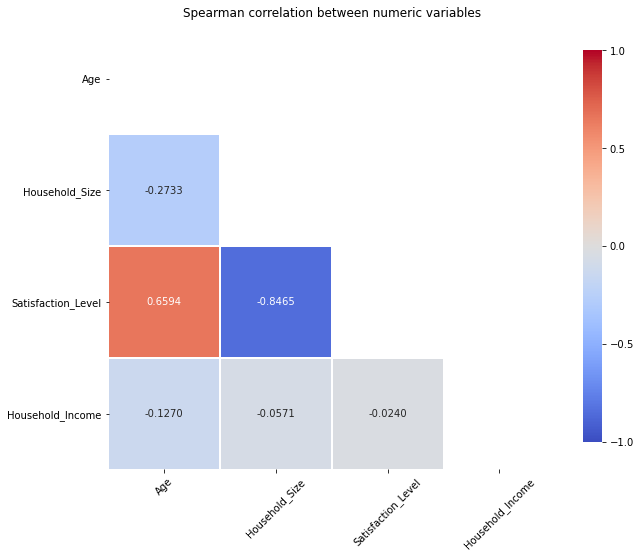

In [41]:
plt_correlation(df)

The Spearman Correlation Matrix indicates a strong negative correlation of -0.84 between the Satisfaction Level and Household Size, meaning that the highest number of people in the citizen's household, the lowest is level of satisfaction with the standard of living in the country.

<div class="alert alert-block alert-warning">
<b>Note:</b> Since there are a lot of categorical variables, the correlation must be analyzed again once the pre-processing phase is completed.
</div>

### 2.3 Data Quality Verification 

Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data quality measures the condition of a dataset to serve its specific purpose based on factors such as accuracy, integrity, completeness, consistency, validity, among others. The data quality assessment is one of the most important steps of any data science project, as poor-data quality could lead to wrong decisions causing big damages to the country.

Although there are some data quality issues that need to be addressed as seen in the summary above, the dataset does not include any serious data quality issues that would result in not being able to continue to try and achieve the recommended goals and plans. Based on the detailed analysis of the variables above, it is possible to say that the quality of the dataset provided by the stakeholders is relatively good, since there are no significant structural issues in it. Nevertheless, a proper data preparation plan will need to be established to deal with outliers and possible errors on the dataset.

**Data quality issues identified:**

- Missing values
	- Foreign_Citizenship: 115 missing values
	- Frequent_Traveler: 63 missing values
	- Household_Size: 273 missing values
	- Satisfaction_Level: 273 missing values
	- Occupation: 104  missing values | if missing = Nothing
	- Political_Participation: 104 missing values | if missing = Unknown
	- Social_Person: 60 missing values
	- Area_Residence: 60 missing values
	- Military_Service: 60 missing values
- Outliers
    - Household: 2 data points outside of the whiskers
    - Satisfaction: 1 data point outside of the whiskers
    - Income: 4 data points outside of the whiskers
- Imbalanced Data
    - Occupation
    - Area of Residence
    - Military Service
- Correlation
    - Strong negative correlation of -0.84 between the Satisfaction Level and Household Size

## 4. Pre-processing<a class="anchor" id="preprocessing"></a>
[Back to Contents](#toc)

In [17]:
# Create a modeling dataset from the original dataset
X = df.copy(deep=True)

### 4.1 Data Selection

Due to the purpose of our study, the following variables were removed for this study: ID, ID_ORIGINAL. These variables were selected because they describe customers characteristics or behaviour and can provide valuable insights to the analysis.

In [18]:
# Remove columns that will not be used in the analysis as they do not represent customer's 
# characteristics or behavior
cols = ['ID', 'ID_ORIGINAL']
X.drop(cols, axis=1, inplace=True)

### 4.2 Data Cleaning

#### Missing Values

#### Errors and Incorrect Values

### 4.3 Data Construction

### 4.4 Data Formatting

#### Encoding Categorical Variables

In [20]:
# Data Visualization after pre-processing - Executive Report

### 4.5 Data Normalization

## 5. Modelling<a class="anchor" id="modelling"></a>
[Back to Contents](#toc)

## 6. Performance Assessment<a class="anchor" id="performance"></a>
[Back to Contents](#toc)

## 7. Conclusion<a class="anchor" id="conclusion"></a>
[Back to Contents](#toc)

<div class="alert alert-block alert-danger">
<b>Danger:</b> This alert box indicates a dangerous or potentially negative action.
</div>

<div class="alert alert-block alert-success">
<b>Success:</b> This alert box indicates a successful or positive action.
</div>

<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not inside code cells, or use for mathematical formulas if needed. Typically also used to display warning messages.
</div>

<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes.</div>